# UFO Sightings Analysis

## Load the CSV file
### Noah Code Starts here

In [2]:
# Import any needed functionality
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as st
#import gmaps

# This will hide any of the small pink messages
import warnings
warnings.filterwarnings("ignore")

# Import API Key
#from config import g_key

In [3]:
# Set file path
file = ("UFO_Data/US_UFO_Sightings.csv")

# Read the csv file
us_ufo_data = pd.read_csv(file)

In [4]:
# Display the csv file as a dataframe
us_ufo_df = pd.DataFrame(us_ufo_data)
us_ufo_df.head()

,Unnamed: 0,city,state,country,shape,comments,latitude,longitude,date,time
0,0,san marcos,tx,us,cylinder,This event took place in early fall around 194...,29.883056,-97.941111,10/10/1949,20:30
1,3,edna,tx,us,circle,My older brother and twin sister were leaving ...,28.978333,-96.645833,10/10/1956,21:00
2,4,kaneohe,hi,us,light,AS a Marine 1st Lt. flying an FJ4B fighter/att...,21.418056,-157.803611,10/10/1960,20:00
3,5,bristol,tn,us,sphere,My father is now 89 my brother 52 the girl wit...,36.595000,-82.188889,10/10/1961,19:00
4,7,norwalk,ct,us,disk,A bright orange color changing to reddish colo...,41.117500,-73.408333,10/10/1965,23:45


In [5]:
# Remove the "Unnamed: 0" index row that accidently came through in the cleaned file
us_ufo_data = us_ufo_df.drop(columns = ["Unnamed: 0"])
us_ufo_data.head()

,city,state,country,shape,comments,latitude,longitude,date,time
0,san marcos,tx,us,cylinder,This event took place in early fall around 194...,29.883056,-97.941111,10/10/1949,20:30
1,edna,tx,us,circle,My older brother and twin sister were leaving ...,28.978333,-96.645833,10/10/1956,21:00
2,kaneohe,hi,us,light,AS a Marine 1st Lt. flying an FJ4B fighter/att...,21.418056,-157.803611,10/10/1960,20:00
3,bristol,tn,us,sphere,My father is now 89 my brother 52 the girl wit...,36.595000,-82.188889,10/10/1961,19:00
4,norwalk,ct,us,disk,A bright orange color changing to reddish colo...,41.117500,-73.408333,10/10/1965,23:45


## Initial Analysis

### Learning more about our dataset

In [6]:
# What is the shape of our dataframe?
# How many sightings are recordered?
us_ufo_data.shape

(63553, 9)

In [7]:
# What kind of datatypes are we looking at?
us_ufo_data.dtypes

city           object
state          object
country        object
shape          object
comments       object
latitude      float64
longitude     float64
date           object
time           object
dtype: object

In [35]:
# What is the first year we have a recorded sighting for, and what is the most recent in this dataframe?

# Can use a min and max of the date column to find this
us_ufo_min_year = us_ufo_data["date"].min()
us_ufo_min_year

us_ufo_max_year = us_ufo_data["date"].max()
us_ufo_max_year

print(f"This dataset ranges from sightings recorded in {us_ufo_min_year} to {us_ufo_max_year}")

This dataset ranges from sightings recorded in 1/1/1910 to 9/9/2013


In [36]:
# What are all of the unique values given for the shape column?

# Our group liked to think of this as the aliens car or "whip" if you are young and cool
alien_whips = us_ufo_data["shape"].unique()
alien_whips

array(['cylinder', 'circle', 'light', 'sphere', 'disk', 'fireball',
       'unknown', 'oval', 'other', 'rectangle', 'chevron', 'formation',
       'triangle', 'cigar', 'delta', 'changing', 'diamond', 'flash',
       'egg', 'teardrop', 'cone', 'cross', 'pyramid', 'round', 'flare',
       'hexagon', 'crescent', 'changed'], dtype=object)

### Where do aliens like to visit?

In [10]:
# Look at the state data to see which state is most visited

# Use a groupby on state
state_group = us_ufo_data.groupby("state")
state_group

# Get the count of each time there was a sighting for that state group to get the count for each state
state_visits = state_group["time"].count()
state_visits

state
ak     311
al     629
ar     578
az    2362
ca    8683
co    1385
ct     865
dc       7
de     165
fl    3754
ga    1235
hi     257
ia     669
id     508
il    2447
in    1268
ks     599
ky     843
la     547
ma    1238
md     818
me     544
mi    1781
mn     996
mo    1431
ms     368
mt     460
nc    1722
nd     123
ne     373
nh     482
nj    1236
nm     693
nv     778
ny    2915
oh    2251
ok     714
or    1667
pa    2319
pr      24
ri     224
sc     986
sd     177
tn    1091
tx    3398
ut     611
va    1248
vt     254
wa    3707
wi    1205
wv     438
wy     169
Name: time, dtype: int64

In [37]:
# Set up a bar graph to show this information a little more clearly

# Get the abbreviations of all of the different states, to be used as the x axis
states = us_ufo_data["state"].unique()

# Need to read the list alphabetically to match with tick locations with groupby results
states_alph = sorted(states)
#states_alph

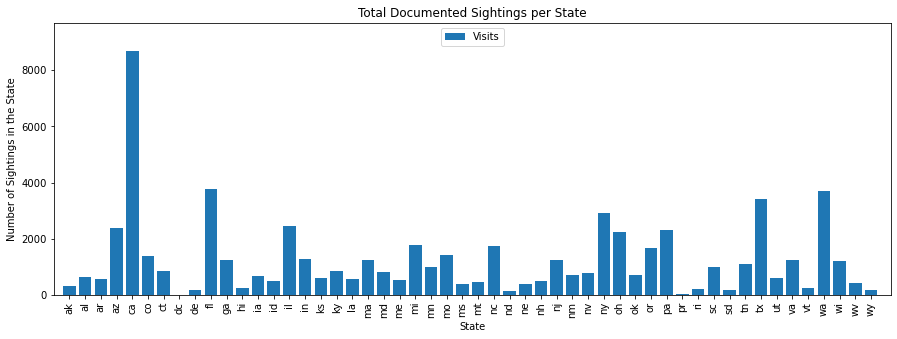

In [39]:
# Generate a bar plot showing the total number of for each state
x_axis = np.arange(0, len(states))

# Grabs each state abbreviation and stores it for the x tick volume as it goes through the list of states
tick_locations = []

for x in x_axis:
    tick_locations.append(x)


# Change the size of the chart to make it more readable
plt.figure(figsize = (15, 5))

# Plot the bar chart
plt.bar(x_axis, state_visits, align = "center")
plt.xticks(tick_locations, states_alph, rotation = 90)

# Add legend
plt.legend(["Visits"], loc = "upper center")

# Create labels for the bar plot
plt.title("Total Documented Sightings per State")
plt.xlabel("State")
plt.ylabel("Number of Sightings in the State")

# Set limits for the bar chart
plt.xlim(-1, len(states_alph) + 0.25)
plt.ylim(0, max(state_visits) + 1000)

# Best practice to always include plt.show
# Even though it is not technically needed in jupyter notebooks
plt.show()

So far from our analysis we can see that most of the sightings for aliens happen in California, followed by Florida, and then by Washington. This is a good start, but we have a city column in our dataset, so we can look even closer to see where these guys are going!!

In [ ]:
# IGNORE THIS CELL

# # Generate a pie plot showing the distribution of visits across the states
# # Labels for the sections of our pie chart
# labels = states


# plt.figure(figsize = (35, 7))


# # Tell matplotlib to create a pie chart filled with corresponding percentages and displayed vertically
# plt.pie(state_visits, labels = state_visits.index.values, autopct="%1.1f%%", startangle=90)
# plt.title("Distribution of UFO Sightings for each state")

# # Display resulting plot
# plt.tight_layout()
# plt.show()

In [40]:
# What city is visited the most regardless of state visits? (Best vacation spot?)

# Use groupby on the city this time
city_group = us_ufo_data.groupby("city")
city_group

# Get the count of visits for each city by recording each time there was a sighting
city_group_visits = city_group.count()["time"]
city_group_visits

# Reset the index
city_group_visits = city_group_visits.reset_index("city")
city_group_visits

# The 5 most popular cities for alien sightings in the US
# Sort our list descending and display the top 5 results (ascending = False)
popular_cities = city_group_visits.sort_values(["time"], ascending = False)
popular_cities.head(5)

,city,time
9006,seattle,471
7786,phoenix,438
5359,las vegas,356
8048,portland,354
5689,los angeles,347


Interestingly, despite California being far and above the state with the most sightings, a city in Washington is the most visited! Maybe it is because the original Starbucks is there? Also very interesting, is that despite Florida being the state with the second highest sightings, none of it's cities crack the top 5.

In [19]:
# What are the top cities within the most visited state?

# We only want to look at data from california so we will use .loc to get only those values from the state column
california = us_ufo_data.loc[us_ufo_data["state"] == "ca"]
california

# This could help determine the best vacation spot for aliens!
ca_city_group = california.groupby("city")
city_group

# Get the count of each time there was a sighting 
ca_city_group_visits = ca_city_group.count()["time"]
city_group_visits

# Reset the index
ca_city_group_visits = ca_city_group_visits.reset_index("city")
ca_city_group_visits


# The 5 most popular cities for alien sightings in the California
# Sort our list descending and display the top 5 results (ascending = False)
popular_ca_cities = ca_city_group_visits.sort_values(["time"], ascending = False)
print(f"These are the 5 Florida cities with most sightings:")
popular_ca_cities.head(5)

These are the 5 Florida cities with most sightings:


,city,time
569,los angeles,347
912,san diego,327
891,sacramento,194
950,san jose,184
940,san francisco,180


In [20]:
# What are the top cities within Florida?

# We only want to look at data from Florida so we will use .loc to get only those values from the state column
florida = us_ufo_data.loc[us_ufo_data["state"] == "fl"]
florida

# This could help determine the best vacation spot for aliens!
fl_city_group = florida.groupby("city")
fl_city_group

# Get the count of each time there was a sighting 
fl_city_group_visits = fl_city_group.count()["time"]
city_group_visits

# Reset the index
fl_city_group_visits = fl_city_group_visits.reset_index("city")
fl_city_group_visits


# The 5 most popular cities for alien sightings in the Florida
# Sort our list descending and display the top 5 results (ascending = False)
popular_fl_cities = fl_city_group_visits.sort_values(["time"], ascending = False)
print(f"These are the 5 Florida cities with most sightings:")
popular_fl_cities.head(5)

These are the 5 Florida cities with most sightings:


,city,time
255,miami,222
311,orlando,213
183,jacksonville,125
438,tampa,123
392,sarasota,77


In [22]:
# What are the top cities within Washington?

# We only want to look at data from Washington so we will use .loc to get only those values from the state column
washington = us_ufo_data.loc[us_ufo_data["state"] == "wa"]
washington

# This could help determine the best vacation spot for aliens!
wa_city_group = washington.groupby("city")
wa_city_group

# Get the count of each time there was a sighting 
wa_city_group_visits = wa_city_group.count()["time"]
city_group_visits

# Reset the index
wa_city_group_visits = wa_city_group_visits.reset_index("city")
wa_city_group_visits


# The 5 most popular cities for alien sightings in the Washington
# Sort our list descending and display the top 5 results (ascending = False)
popular_wa_cities = wa_city_group_visits.sort_values(["time"], ascending = False)
print(f"These are the 5 Washington cities with most sightings:")
popular_wa_cities.head(5)

These are the 5 Washington cities with most sightings:


,city,time
346,seattle,471
468,vancouver,129
405,spokane,125
431,tacoma,114
124,everett,97


In [ ]:
# # Farshad way

# WE CAN PROBABLY DELETE THIS CELL, KEEP FOR NOW FOR REFERENCE

# city_group = us_ufo_data.groupby(["state","city"])
# city_group

# city_group_visits = city_group.count()["time"]
# city_group_visits

# city_group_visits = city_group_visits.reset_index()
# city_group_visits

In [ ]:
# US Heatmap for alien visits over the years
# Configure gmaps
gmaps.configure(api_key = g_key)

# Use the lat and lng columns as the locations variable
locations = us_ufo_data[["Latitude", "Longitude"]]

# Use the state visits as the weight variable
# MIGHT HAVE TO MAKE A NEW ONE FOR CITY COUNTS IDK??
state_visits

In [ ]:
# Generate the map
# From class discussion, it is important to set a center, and a zoom level to help make the map display properly
# Got the center and zoom_level values through trial and error
fig = gmaps.figure(center=(25.0, 15.0), zoom_level = 1.8)

# Generate a new layer on the map - Heat layer
heat_layer = gmaps.heatmap_layer(locations, weights = state_visits,
                                 dissipating = False, max_intensity = 100,
                                 point_radius = 3)

# Add layer
fig.add_layer(heat_layer)

# Display figure
fig

### What are they drivings??

In [ ]:
# Insert tesla in space pic

In [23]:
# We will look at the shapes recorded for each sighting to determine what the aliens are driving?
alien_cars = us_ufo_data.groupby("shape")
alien_cars

# Get the count of each time there was a sighting 
shape_count = alien_cars.count()["time"]
shape_count

# Reset the index
alien_fav_whip = shape_count.reset_index()
alien_fav_whip

,shape,time
0,changed,1
1,changing,1584
2,chevron,815
3,cigar,1643
4,circle,6117
5,cone,247
6,crescent,1
7,cross,188
8,cylinder,1026
9,delta,6


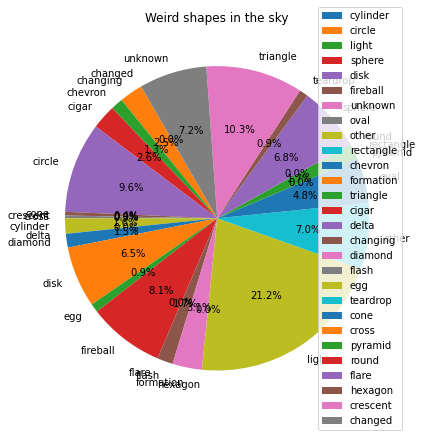

In [24]:
# # Generate a pie plot showing the distribution of visits across the states
# # Labels for the sections of our pie chart
labels = alien_whips


plt.figure(figsize = (35, 7))


# # Tell matplotlib to create a pie chart filled with corresponding percentages and displayed vertically
plt.pie(shape_count, labels = shape_count.index.values, autopct="%1.1f%%", startangle=120)
plt.title("Weird shapes in the sky")
plt.legend(alien_whips, loc = "right") 

# # Display resulting plot
#plt.axis("equal")
plt.show()

### Best time for cow abduction?

In [27]:
us_ufo_data.head()

,city,state,country,shape,comments,latitude,longitude,date,time
0,san marcos,tx,us,cylinder,This event took place in early fall around 194...,29.883056,-97.941111,10/10/1949,20:30
1,edna,tx,us,circle,My older brother and twin sister were leaving ...,28.978333,-96.645833,10/10/1956,21:00
2,kaneohe,hi,us,light,AS a Marine 1st Lt. flying an FJ4B fighter/att...,21.418056,-157.803611,10/10/1960,20:00
3,bristol,tn,us,sphere,My father is now 89 my brother 52 the girl wit...,36.595000,-82.188889,10/10/1961,19:00
4,norwalk,ct,us,disk,A bright orange color changing to reddish colo...,41.117500,-73.408333,10/10/1965,23:45


In [29]:
# First we want to create a new column that takes the time and buckets it into one hour segments
us_ufo_data["hour"] = np.floor(us_ufo_data["time"].str.replace(":", "").astype("int") / 100)

# This makes the "24" hour value and combines with the 0 hour value (midnight)
# It is dividing by 24 and putting the remainder together (like fizbuzz!)
#us_ufo_data["hour"].max()
us_ufo_data["hour"] %= 24 

us_ufo_data.head()

,city,state,country,shape,comments,latitude,longitude,date,time,hour
0,san marcos,tx,us,cylinder,This event took place in early fall around 194...,29.883056,-97.941111,10/10/1949,20:30,20.0
1,edna,tx,us,circle,My older brother and twin sister were leaving ...,28.978333,-96.645833,10/10/1956,21:00,21.0
2,kaneohe,hi,us,light,AS a Marine 1st Lt. flying an FJ4B fighter/att...,21.418056,-157.803611,10/10/1960,20:00,20.0
3,bristol,tn,us,sphere,My father is now 89 my brother 52 the girl wit...,36.595000,-82.188889,10/10/1961,19:00,19.0
4,norwalk,ct,us,disk,A bright orange color changing to reddish colo...,41.117500,-73.408333,10/10/1965,23:45,23.0


In [30]:
# We will look at the hour recorded for each sighting to determine peak times of alien sightings (cow abductions!!)
time_group = us_ufo_data.groupby("hour")

# Get the list of hours (in military time)
times_of_day = us_ufo_data["hour"].unique()
times_of_day.sort()

# Get the count of visits by seeing how many times each hour is recorded
num_visits = time_group["hour"].count()
num_visits

hour
0.0     3520
1.0     2453
2.0     1746
3.0     1513
4.0     1175
5.0     1313
6.0      972
7.0      708
8.0      649
9.0      792
10.0     941
11.0     897
12.0    1051
13.0    1011
14.0    1004
15.0    1119
16.0    1272
17.0    2073
18.0    3252
19.0    4977
20.0    7109
21.0    9432
22.0    8616
23.0    5958
Name: hour, dtype: int64

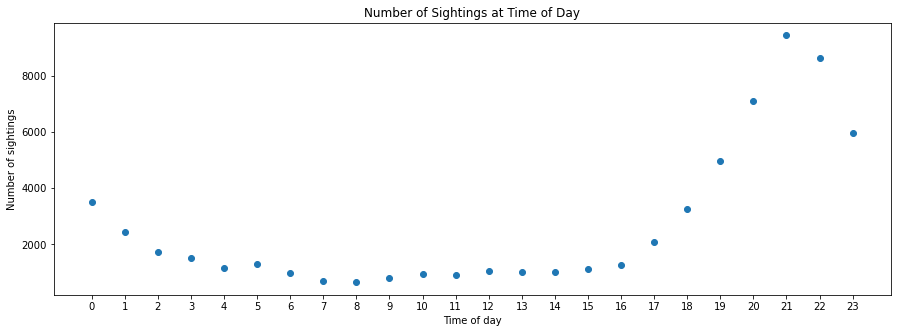

In [31]:
# Plot the time of sightings data with a scatter plot

# Update the figure size so that it will be easily readable
plt.figure(figsize = (15, 5))

# Scatter plot to see if the time of day has any correlation with total number of visits
# time of day is our x axis and the number of visits (sightings) is our y
plt.scatter(times_of_day, num_visits)

# Arrange tick labels
plt.xticks(np.arange(0, 24, 1))

# Set the title and x and y labels of the plot
plt.title("Number of Sightings at Time of Day")
plt.xlabel("Time of day")
plt.ylabel("Number of sightings")

# Best practice to use plt.show()
plt.show()

Here we can see that most recorded sightings of UFO's occur during the evening and night hours. This would make sense as it is darker and probably easier to see their space ships at night than during the day.

### Do they keep coming back?

In [32]:
# Over the years are the number of sightings increasing or decreasing in any pattern or rate?

# Same as in the previous chart, we will need to split out the date column information and solo in on the year
calendar = us_ufo_data["date"].str.split("/", n = 2, expand = True)
us_ufo_data["day"] = calendar[0]
us_ufo_data["month"] = calendar[1]
us_ufo_data["year"] = calendar[2]

us_ufo_data.head()

,city,state,country,shape,comments,latitude,longitude,date,time,hour,day,month,year
0,san marcos,tx,us,cylinder,This event took place in early fall around 194...,29.883056,-97.941111,10/10/1949,20:30,20.0,10,10,1949
1,edna,tx,us,circle,My older brother and twin sister were leaving ...,28.978333,-96.645833,10/10/1956,21:00,21.0,10,10,1956
2,kaneohe,hi,us,light,AS a Marine 1st Lt. flying an FJ4B fighter/att...,21.418056,-157.803611,10/10/1960,20:00,20.0,10,10,1960
3,bristol,tn,us,sphere,My father is now 89 my brother 52 the girl wit...,36.595000,-82.188889,10/10/1961,19:00,19.0,10,10,1961
4,norwalk,ct,us,disk,A bright orange color changing to reddish colo...,41.117500,-73.408333,10/10/1965,23:45,23.0,10,10,1965


In [33]:
# We will look at the year recorded for each sighting
year_group = us_ufo_data.groupby("year")

# Get the years recorded
years = us_ufo_data["year"].unique()
years.sort()

# Get the count of each time there is a UFO sighting that year
visits_per_year = year_group["year"].count()
visits_per_year

year
1910       2
1920       1
1925       1
1929       1
1931       2
        ... 
2010    3507
2011    4332
2012    6253
2013    5991
2014    1931
Name: year, Length: 83, dtype: int64

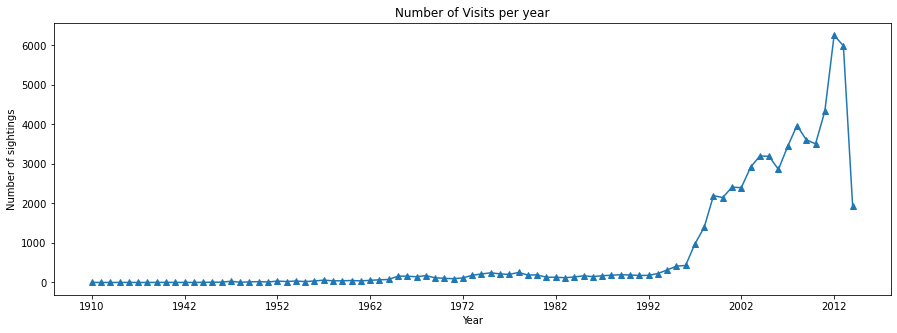

In [34]:
# Plot the time of sightings data with a line chart

# Update the figure size so that it will be easily readable
plt.figure(figsize = (15, 5))

# Line chart to see if the sightings over the years in the US has an pattern
# years is our x axis and visits per year is our y axis
plt.plot(years, visits_per_year, marker = "^")

# Arrange tick labels
plt.xticks(np.arange(0, 84, 10))

# Set the title and x and y labels of the plot
plt.title("Number of Visits per year")
plt.xlabel("Year")
plt.ylabel("Number of sightings")

# Best practice to use plt.show()
plt.show()

As we can see in the line chart above, there have been an exponential increase in UFO sightings since the mid 90's. I wonder if there were any event around this time that would have caused people to look up at the sky more often?

### Noah Code Ends here

## Deeper Analysis
### Mahnoor Code Starts here

### Regression or hypothesis testing

In [ ]:
# Regression possibilities

#    Can we predict the number of total sightings for 2016?
#    What city will have the highest visits in 2016?
#    Can we predict what region an alien is most likely to visit on their next vacation to earth?

In [ ]:
# Hypothesis testing possibilities

#    We believe that aliens prefer to visit at night, and that sightings will most likely happen between 10pm and 2am
#    We think us excitement around aliens peaks around halloween, so the majority of sightings will be in the fall (Sept - Nov)
#    We believe the midwest, not the southwest (area 51) will have the most sightings (More cows to abduct!!)
#    Is area 51 (Nevada and surrounding area) truly the hub of all recorded alien activity??

In [ ]:
## We could potentially look at the 2016 csv we almost used to see how accurate our predictions were??
## Idk if that would be a stretch or like bad to compare (apples to oranges?)

### Mahnoor Code Ends here